# Methodology for Naive Bayes approach on classifier and generative model of digits

## Motivation - Problem understanding

The study of large amounts of data leaded to questions about how could be the accurate way to classify data into different categories. The state of the art in the field is bouying from past years and the complexity on this kind of models also have increased. However, here we're going to implement a bayesian approach on a digit identification database, this methodology focuses on estimate the probabilities of categories 

The MNIST database from the scikit-learn library will be used. This MNIST database includes the table of pixels or variables of images and a vector that contains the classes or categories to which these images are classified. This database contains 70,000 images of hand-written digits, each one having 28x28 pixels.

In [92]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.metrics import classification_report
import warnings
import random
warnings.filterwarnings("ignore")

In [93]:
mnist_df = fetch_openml('mnist_784')
mnist_df.data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


From a vector perspective, the database has on every row the caracterization of the pixels that constitutes each image.

## Data cleaning

Is needed to assert if the database meets quality requirements, firstly, we're exploring using `.info()` function.

In [94]:
mnist_df.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


In [95]:
mnist_df.data.astype('int').astype(int)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
print("Quantity of nulls, NaNs or duplicated rows:", [mnist_df.data.isna().sum().sum(), 
                                                      mnist_df.data.isna().sum().sum(), 
                                                      mnist_df.data.duplicated().sum()])

Quantity of nulls, NaNs or duplicated rows: [0, 0, 0]


As we can see above, the successfull data transformation into interger variable allows us to conclude that every item on the dataset is valid. Furthermore, there is no evidence on null, duplicated or missing data. The domain of input data will be $[0,255]$, as intended previously in the case. In this sense, further data cleaning procedures are not required.

In [97]:
pd.DataFrame(mnist_df.data.describe().mean(axis = 1), columns=["Average"])

,Average
count,70000.000000
mean,33.385965
std,49.255704
min,0.000000
25%,0.000000
50%,12.267857
75%,62.571429
max,220.459184


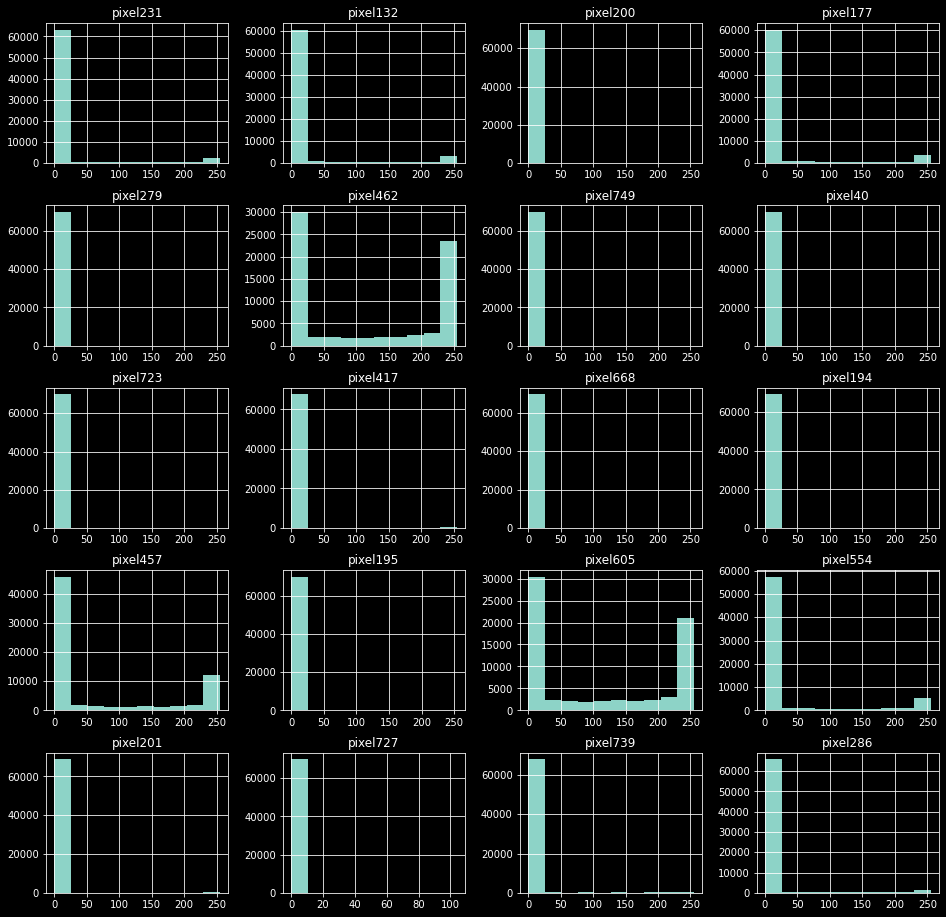

In [98]:
mnist_df.data.iloc[:,random.sample(range(0, 784), 20,)].hist(figsize=(16,16)) 
plt.show()

As shown above, the behaviour of the pixels aren't following a specific distribution, however the data  of every pixel is accumulated on zero as the empty space in pixels due to numbers writting allow it. 

### Balancing data

From data exploration we could establish that there are less number of pixels associated to number 5 than others, this could impose issues on training model for classifying new data and we need to proceed to resample (subsample) the dataset to correct the issue that could arise from that. 

In [99]:
mnist_df.target.value_counts().sort_index()


0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
Name: class, dtype: int64

In [100]:
mnist = pd.concat([mnist_df.data, mnist_df.target], axis = 1)

min_s = mnist['class'].value_counts().min()

mnist_balance = pd.DataFrame()
for cat in mnist['class'].unique():
    cat_df = mnist[mnist['class'] == cat]
    s_bal = resample(cat_df, replace=True, n_samples=min_s, random_state=1)
    mnist_balance = pd.concat([mnist_balance, s_bal])

mnist_balance['class'].value_counts()

9    6313
8    6313
7    6313
6    6313
5    6313
4    6313
3    6313
2    6313
1    6313
0    6313
Name: class, dtype: int64

Finally, data preparation concludes with database segmentation between target and pixels information.

In [101]:
data = mnist_balance.iloc[:,0:-1] 
target = mnist_balance.iloc[:,-1] 

# Methodology - Modeling
The Naive Bayes classifier is a statistical model based on Bayes' theorem or Bayesian statistics. It relies on the fact that if there are two sets A and B, the conditional probability of A|B is defined as:
$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

This model is used to predict whether an individual has a certain characteristic or belongs to a certain category based on certain variables measured in these individuals. Take a reduced experimental case that has two classes to which we want to classify individuals. We have a set "n" of features within a matrix $X={X_1, X_2, x_3}$. In a similar this scenario, the variables that could describe these states are categorical.

The Naive Bayes classifier's goal is to estimate the following probabilities for each individual:

$$P(\omega_1|X) = \frac{P(X|\omega_1) \cdot P(\omega_1)}{P(X)}$$
$$P(X) = P(X|\omega_1) \cdot P(\omega_1) + P(X|\omega_2) \cdot P(\omega_2)$$

Then, if $P(\omega_1)>P(\omega_2)$, the individual is classified in the first state; otherwise, it is classified in the second state.

For the calculation of $P(\omega_1∣X)= P(X) P(X∣\omega_1)\dot P(\omega_1)$, we know that $P(X)=P(X∣\omega_1)⋅P(L)+P(X∣\omega_2)\dot P(\omega_2)$. Using the assumption that all variables are independent, we can simplify the above expressions. 

It is this assumption that gives the classification model the name "naive" because this assumption may not easily hold in practice, as variables may be related. However, this is a stregnth as we could be more flexible on which distribution could describe the experiment. Then:

$$P(X|\omega_1) = P(X_1|\omega_1) \cdot P(X_2|\omega_1) \cdot P(X_3|\omega_1)$$
$$P(X|\omega_2) = P(X_1|\omega_2) \cdot P(X_2|\omega_2) \cdot P(X_3|\omega_2)$$

As can be seen, now all the elements are available to calculate the probabilities $P(\omega_1|X)$ and $P(\omega_2|X)$. This entire procedure can also be applied when the variables are continuous by working with probability density functions given the values of the variables. For our scenario, we can now calculate, the probabilities from the different combinations that can occur, ie, $P(\omega_j∣X_i)$ where $i,j={1,2,3}$.

## Model training and testing

1. As seen earlier, the model to be trained is Naive Bayes using 20\% of available data.

2. Principal Component Analysis (PCA) is applied to find uncorrelated variables.

In [102]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1)
pca = PCA(n_components=0.95)
pca.fit(X_train)
train_x = pca.transform(X_train)
test_x = pca.transform(X_test)

In [103]:
from sklearn.naive_bayes import GaussianNB
modelN = GaussianNB()
modelN.fit(train_x, y_train)

GaussianNB()

3. Model estimation: we have selected gaussian model and multinomial complement model. 

Gaussian model is apropiate in a PCA transformed variable display, as continuous transformation on the data allowing variables to accumulate probability density in between integer numbers.

In the second model, the complement multinomial, we take original data as the entries of this requires non negative values and PCA transformation computes negatives. A vantage of this model is that is an adjusted version of multinomial model as the data could behave, furthermore it has been documented that this model has outperfmormed the multinomial model in text classification tasks.

In [104]:
from sklearn.naive_bayes import ComplementNB
modelC = ComplementNB()
modelC.fit(X_train, y_train)

ComplementNB()

Once the models are trained with the same balanced sample, we proceed to measure their performance as follows:

In [105]:
y_pred1 = modelN.predict(test_x)
report1 = classification_report(y_test, y_pred1, target_names= y_test.unique())

y_pred2 = modelC.predict(X_test)
report2 = classification_report(y_test, y_pred2, target_names= y_test.unique())

In [106]:
print("GaussianNB",report1)

GaussianNB               precision    recall  f1-score   support

           0       0.96      0.91      0.94      1296
           3       0.98      0.93      0.95      1287
           7       0.66      0.86      0.75      1229
           1       0.79      0.83      0.81      1235
           6       0.88      0.82      0.85      1263
           5       0.83      0.83      0.83      1315
           8       0.94      0.87      0.90      1270
           9       0.91      0.81      0.86      1208
           2       0.87      0.86      0.87      1264
           4       0.80      0.83      0.82      1259

    accuracy                           0.86     12626
   macro avg       0.86      0.86      0.86     12626
weighted avg       0.86      0.86      0.86     12626



In [107]:
print("ComplementNB",report2)

ComplementNB               precision    recall  f1-score   support

           0       0.63      0.91      0.74      1296
           3       0.71      0.96      0.82      1287
           7       0.83      0.75      0.79      1229
           1       0.67      0.78      0.72      1235
           6       0.92      0.60      0.73      1263
           5       0.81      0.51      0.63      1315
           8       0.79      0.87      0.83      1270
           9       0.61      0.87      0.72      1208
           2       0.86      0.42      0.57      1264
           4       0.67      0.55      0.61      1259

    accuracy                           0.72     12626
   macro avg       0.75      0.72      0.71     12626
weighted avg       0.75      0.72      0.71     12626



4. Performance comparisons:

As metrics showed for precision, recal, f-1 score and support, the gaussian model with PCA transformation is better than multinomial complement, as outperforms the rival model by 11\% of precision and way better accuracy in test data.

# Numbers generation

As one of the objectives of the model is to generate numbers based on bayesian properties and data from which the model has calibrated, we're going to construct from model probability characterized by the estimated probability density function. To accomplish that we will to use Binomial model for easyness of probability extraction and interpretation.

In [108]:
from sklearn.naive_bayes import BernoulliNB
modelB = BernoulliNB()
modelB.fit(X_train, y_train)

BernoulliNB()

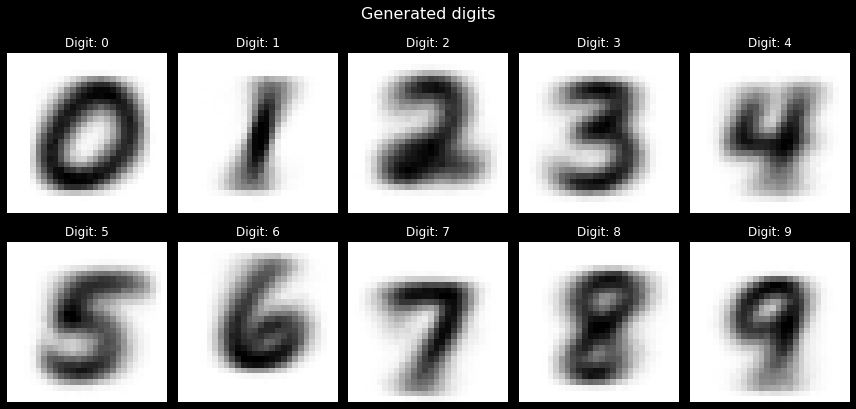

In [109]:
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
probability = np.exp(modelB.feature_log_prob_)
# Enumerar las etiquetas y sus correspondientes probabilidades
labels = list(range(10))

# Generar y mostrar las imágenes

for i, ax in enumerate(axs.flatten()):

    vec_generated_total = pd.DataFrame()
    for j in range(1000):
        vec_generated = np.random.binomial(1, probability[i])
        vec_generated_total[j] = vec_generated
    vec_generated_total = vec_generated_total.mean(axis = 1)
    
    img = np.array(vec_generated_total).reshape((28, 28))

    ax.imshow(img, cmap="gray_r")

    ax.set_title(f"Digit: {labels[i]}")
    ax.axis("off")  

plt.suptitle("Generated digits", fontsize=16)
plt.tight_layout()

Finnally, we have seen that the classification under naive Bayes approach is flexible enough to adapt some different probability distribution functions in order to reflect the nature of the experiments that we are analyzing. Furthermore, it's theory and methodology is robust and allowed us to properly estimate the conditional distribution from the selected train data, from  which we were able to generate digits by established categories based only on probability-generated vectors on a pixel level.

As a conclusion, there are some pros and cons on using Naive Bayes classification approach:

Pros:

- Predict segments quickly and easily: the independence assumption is effective in models with a small training set.
- Although estimates may be unreliable, they often serve as a starting point for understanding the data.

Cons:

- In real situations, features are unlikely to be completely independent.
- Estimates are based on the data used for training and are limited to that data set.